# Домашняя работа № 4

### Автор: Кузнецов С.И.

In [1]:
import pandas as pd

In [2]:
geo = pd.read_excel('geo.xlsx')
geo.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [3]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108806 entries, 0 to 108805
Data columns (total 3 columns):
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.3 MB


Изобразим группы на карте в масштабе

In [4]:
longitude_min = geo.x.min()
longitude_max = geo.x.max()
latitude_min = geo.y.min()
latitude_max = geo.y.max()

parralel_dist = 111.321  # Расстояние между двумя параллелями, км
meridian_dist = 62.394   # Расстояние между двумя меридианами, км (https://www.kakras.ru/mobile/book/dlina-dugi.html)

latitude_dist = (longitude_max - longitude_min) * meridian_dist # Максимальное расстояние по широте, км
longitude_dist = (latitude_max - latitude_min) * parralel_dist # Максимальное расстояние по долготе, км

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'png'

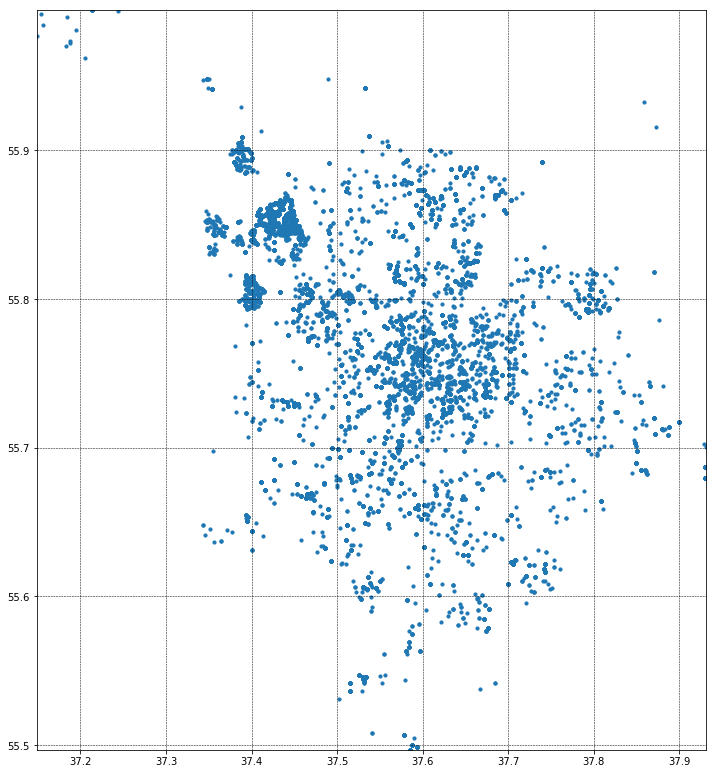

In [6]:
plt.figure(figsize = (12, 12 * longitude_dist / latitude_dist))
plt.axis([longitude_min, longitude_max, latitude_min, latitude_max])
plt.grid(b = True, linestyle='--', linewidth=.5, color = 'black')
_ = plt.scatter(x = geo.x, y = geo.y, s=10)
plt.show()

Для кластеризации введем локальные координаты таким образом, чтобы расстояние между двумя точками было равно Евклидову расстоянию.

Начало координат - точка с географическими координатами *longitude_min*, *latitude_min*.

In [7]:
geo['X_loc'] = (geo.x - longitude_min) * meridian_dist
geo['Y_loc'] = (geo.y - latitude_min) * parralel_dist

In [8]:
geo.head()

,x,y,comment_class,X_loc,Y_loc
0,37.612416,55.777454,-1,28.926046,31.227210
1,37.612416,55.777454,-1,28.926046,31.227210
2,37.603298,55.742108,-1,28.357137,27.292458
3,37.558526,55.728758,-1,25.563633,25.806323
4,37.566431,55.731794,-1,26.056857,26.144293


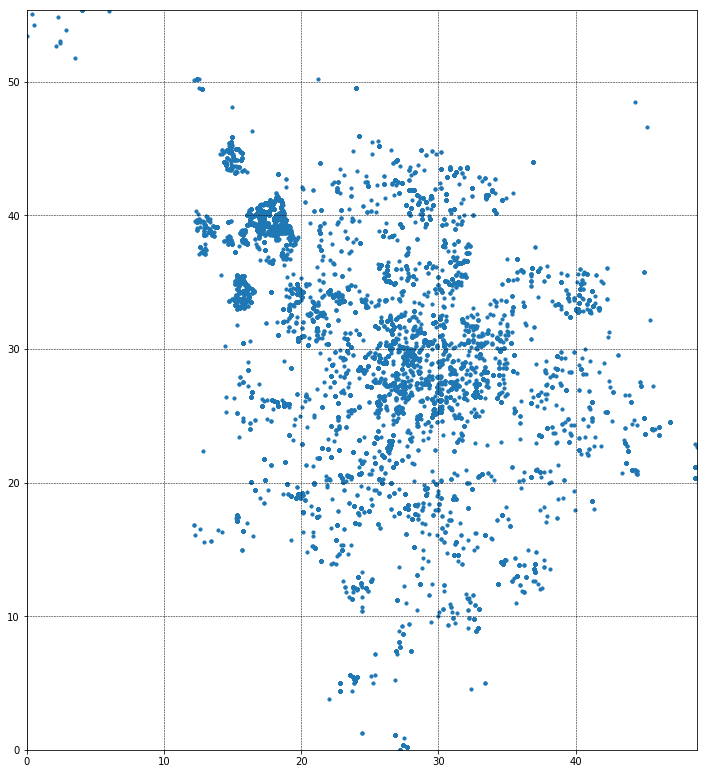

In [9]:
plt.figure(figsize = (12, 12 * longitude_dist / latitude_dist))
plt.axis([0, latitude_dist, 0, longitude_dist])
plt.grid(b = True, linestyle='--', linewidth=.5, color = 'black')
_ = plt.scatter(x = geo.X_loc, y = geo.Y_loc, s=10)
plt.show()

In [10]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [11]:
geo.shape

(108806, 5)

In [12]:
geo.comment_class.value_counts()

-1    95147
 1    13659
Name: comment_class, dtype: int64

In [13]:
algo = DBSCAN(min_samples = 20, eps = .5)
geo_sub = geo[geo.comment_class == 1]
clusters = algo.fit(geo_sub[['X_loc', 'Y_loc']])


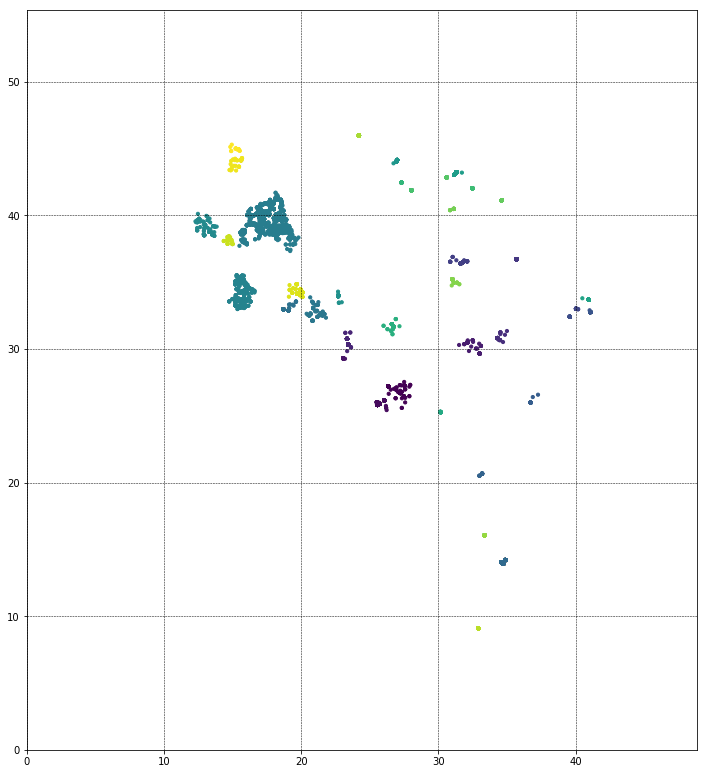

In [14]:
geo_clust = geo_sub[clusters.labels_ != -1]
plt.figure(figsize = (12, 12 * longitude_dist / latitude_dist))
plt.axis([0, latitude_dist, 0, longitude_dist])
plt.grid(b = True, linestyle='--', linewidth=.5, color = 'black')
_ = plt.scatter(x = geo_clust.X_loc, y = geo_clust.Y_loc, c = clusters.labels_[clusters.labels_ != -1], s=10)
plt.show()

Выберем оптимальное количество кластеров.

In [15]:
k_inertia = []
ks = range(1,20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(geo[['X_loc', 'Y_loc']])
    k_inertia.append(clf_kmeans.inertia_)
    print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


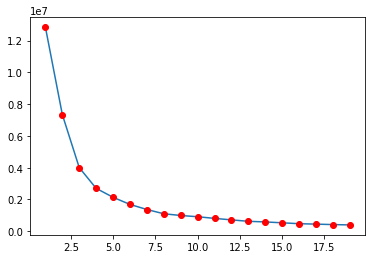

In [16]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

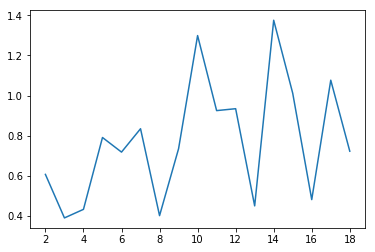

In [17]:
diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [18]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3

**Вывод:** оптимальное количество кластеров - 3